In [229]:
import os
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [230]:
os.listdir()

['.ipynb_checkpoints',
 '.jovianrc',
 '3dplot.xlsx',
 'aussie_rain.joblib',
 'Capillry_Flow_conditions.ipynb',
 'Clustering.ipynb',
 'Decision Trees and Hyperparameters.ipynb',
 'insurance.csv',
 'kaggle (1).json',
 'Linear Regression.ipynb',
 'Logistic Regression for classification.ipynb',
 'medical.csv',
 'notebooks_Practise.ipynb',
 'Reverse_words_in_sentence.ipynb',
 'test_inputs.parquet',
 'test_targets.parquet',
 'train_inputs.parquet',
 'train_targets.parquet',
 'Valve_flow.csv',
 'Valve_flow.xlsx',
 'val_inputs.parquet',
 'val_targets.parquet',
 'weather-dataset-rattle-package',
 'weatherAUS.csv']

In [231]:
raw_df = pd.read_csv('Valve_flow.csv')

In [232]:
raw_df

,h1/h2,w1/w2,theta,flow_condition
0,0.500000,0.50,72.50,No
1,0.666667,0.50,72.50,No
2,0.750000,0.50,72.50,No
3,0.800000,0.50,72.50,No
4,0.857143,0.50,72.50,No
...,...,...,...,...
316,0.888889,0.25,42.11,Yes
317,0.500000,0.25,48.93,Yes
318,0.666667,0.25,48.93,Yes
319,0.750000,0.25,48.93,Yes


In [233]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   h1/h2           321 non-null    float64
 1   w1/w2           321 non-null    float64
 2   theta           321 non-null    float64
 3   flow_condition  321 non-null    object 
dtypes: float64(3), object(1)
memory usage: 10.2+ KB


In [234]:
raw_df.describe()

,h1/h2,w1/w2,theta
count,321.000000,321.000000,321.000000
mean,0.684105,0.337606,53.147819
std,0.157567,0.078609,13.656923
min,0.333333,0.250000,32.800000
25%,0.600000,0.285714,42.110000
50%,0.750000,0.333333,55.660000
75%,0.800000,0.400000,66.400000
max,0.888889,0.500000,72.500000


## Training, Validation and Test Sets

    Let's divide the data we have into three datasets for training, validation and testing. We will split the data into 60%, 20%, 20%

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
train_val_df, test_df = train_test_split(raw_df, test_size = 0.2, random_state = 43)
train_df, val_df = train_test_split(raw_df, test_size = 0.25, random_state = 43)

In [237]:
pd.value_counts(train_df['flow_condition'])

No     137
Yes    103
Name: flow_condition, dtype: int64

In [238]:
pd.value_counts(val_df['flow_condition'])

No     48
Yes    33
Name: flow_condition, dtype: int64

In [239]:
pd.value_counts(test_df['flow_condition'])

No     41
Yes    24
Name: flow_condition, dtype: int64

In [240]:
train_df

,h1/h2,w1/w2,theta,flow_condition
47,0.750000,0.333333,55.66,No
10,0.857143,0.500000,66.40,No
160,0.666667,0.250000,48.93,No
299,0.750000,0.250000,32.80,Yes
140,0.500000,0.250000,72.50,No
...,...,...,...,...
58,0.857143,0.400000,72.50,No
277,0.666667,0.285714,32.80,Yes
305,0.500000,0.250000,32.80,Yes
255,0.750000,0.333333,32.80,Yes


In [241]:
val_df

,h1/h2,w1/w2,theta,flow_condition
142,0.666667,0.250000,72.50,No
64,0.857143,0.400000,66.40,No
183,0.857143,0.250000,48.93,No
126,0.666667,0.285714,55.66,No
170,0.888889,0.250000,72.50,No
...,...,...,...,...
220,0.800000,0.400000,42.11,Yes
115,0.750000,0.285714,72.50,No
184,0.888889,0.250000,48.93,No
301,0.333333,0.250000,42.11,Yes


In [242]:
test_df

,h1/h2,w1/w2,theta,flow_condition
142,0.666667,0.250000,72.50,No
64,0.857143,0.400000,66.40,No
183,0.857143,0.250000,48.93,No
126,0.666667,0.285714,55.66,No
170,0.888889,0.250000,72.50,No
...,...,...,...,...
219,0.750000,0.400000,42.11,Yes
246,0.857143,0.400000,42.11,Yes
119,0.600000,0.285714,66.40,No
272,0.750000,0.285714,42.11,Yes


In [243]:
input_cols = list(train_df.columns)[:-1]
target_cols = 'flow_condition'

In [244]:
target_cols

'flow_condition'

In [245]:
input_cols

['h1/h2', 'w1/w2', 'theta']

In [246]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [247]:
val_inputs = val_df[input_cols].copy()
val_targets =  val_df[target_cols].copy()

In [248]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [249]:
train_inputs

,h1/h2,w1/w2,theta
47,0.750000,0.333333,55.66
10,0.857143,0.500000,66.40
160,0.666667,0.250000,48.93
299,0.750000,0.250000,32.80
140,0.500000,0.250000,72.50
...,...,...,...
58,0.857143,0.400000,72.50
277,0.666667,0.285714,32.80
305,0.500000,0.250000,32.80
255,0.750000,0.333333,32.80


In [250]:
train_targets.dtype

dtype('O')

## Training a logistic Regression Model

In [251]:
from sklearn.linear_model import LogisticRegression

In [252]:
model = LogisticRegression(solver = 'liblinear')

In [253]:
model.fit(train_inputs,train_targets)

LogisticRegression(solver='liblinear')

In [254]:
print(model.coef_)

[[ 1.98312663  2.81060953 -0.14463119]]


In [255]:
print(model.intercept_)

[4.66463612]


In [256]:
train_preds = model.predict(train_inputs)
train_preds

array(['No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',


In [257]:
train_targets

47      No
10      No
160     No
299    Yes
140     No
      ... 
58      No
277    Yes
305    Yes
255    Yes
320    Yes
Name: flow_condition, Length: 240, dtype: object

In [258]:
train_probs = model.predict_proba(train_inputs)
train_probs

array([[0.72338625, 0.27661375],
       [0.86220754, 0.13779246],
       [0.59566418, 0.40433582],
       [0.10805825, 0.89194175],
       [0.98412347, 0.01587653],
       [0.50565863, 0.49434137],
       [0.96760784, 0.03239216],
       [0.96435168, 0.03564832],
       [0.41107996, 0.58892004],
       [0.80101157, 0.19898843],
       [0.9780413 , 0.0219587 ],
       [0.96580766, 0.03419234],
       [0.92752932, 0.07247068],
       [0.08139165, 0.91860835],
       [0.70311276, 0.29688724],
       [0.94923627, 0.05076373],
       [0.57355268, 0.42644732],
       [0.31773206, 0.68226794],
       [0.77909845, 0.22090155],
       [0.9111118 , 0.0888882 ],
       [0.71506338, 0.28493662],
       [0.0987573 , 0.9012427 ],
       [0.08423381, 0.91576619],
       [0.35458316, 0.64541684],
       [0.47222785, 0.52777215],
       [0.96286362, 0.03713638],
       [0.53041037, 0.46958963],
       [0.0896757 , 0.9103243 ],
       [0.52449245, 0.47550755],
       [0.5382287 , 0.4617713 ],
       [0.

In [259]:
from sklearn.metrics import accuracy_score

In [260]:
accuracy_score(train_targets, train_preds)

0.9

In [261]:
val_preds = model.predict(val_inputs)
val_preds

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [262]:
accuracy_score(val_targets,val_preds)

0.8888888888888888

In [263]:
test_preds = model.predict(test_inputs)
test_preds

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'No'], dtype=object)

In [264]:
accuracy_score(test_targets,test_preds)

0.8923076923076924

In [265]:
from sklearn.metrics import confusion_matrix

In [266]:
cf = confusion_matrix(train_targets,train_preds, normalize = 'true')

Text(0.5, 1.0, 'Training Confusion Matrix')

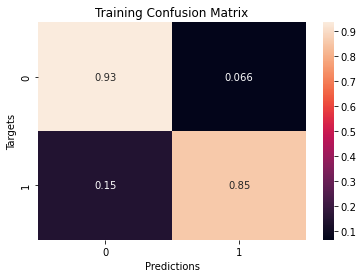

In [267]:
sns.heatmap(cf,annot = True)
plt.xlabel('Predictions')
plt.ylabel('Targets')
plt.title('Training Confusion Matrix')

In [268]:
def predict_and_plot(inputs,targets, name = ''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets,preds)
    
    print("Accuracy Score: ", accuracy*100)
    
    cf = confusion_matrix(targets,preds, normalize = 'true' )
    plt.figure
    sns.heatmap(cf, annot = True)
    plt.xlabel('Predictions')
    plt.ylabel('Targets')
    plt.title('{} Confusion Matrix' .format(name))
    
    return preds

Accuracy Score:  90.0


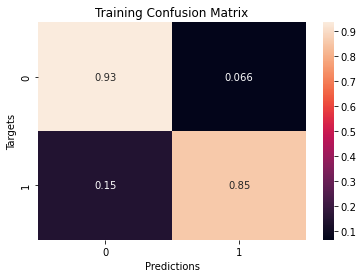

In [269]:
train_preds = predict_and_plot(train_inputs, train_targets, name = 'Training')

Accuracy Score:  88.88888888888889


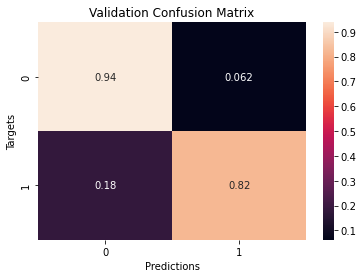

In [270]:
train_preds = predict_and_plot(val_inputs,val_targets, name = 'Validation')

Accuracy Score:  89.23076923076924


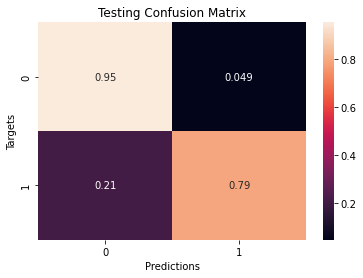

In [271]:
train_preds = predict_and_plot(test_inputs,test_targets, name = 'Testing')

In [272]:
def random_guess(inputs):
    return np.random.choice(["No","Yes"], len(inputs))

In [273]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [274]:
def all_yes(inputs):
    return np.full(len(inputs), "Yes")

In [275]:
accuracy_score(train_targets, random_guess(train_inputs))

0.49166666666666664

In [276]:
accuracy_score(test_targets, all_no(test_inputs))

0.6307692307692307

## Decision Tree Classifier

In [277]:
from sklearn.tree import DecisionTreeClassifier

In [278]:
model = DecisionTreeClassifier(random_state = 43)

In [279]:
%%time
model.fit(train_inputs,train_targets)

CPU times: total: 0 ns
Wall time: 5.01 ms


DecisionTreeClassifier(random_state=43)

### Evaluation

In [280]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [281]:
train_preds = model.predict(train_inputs)

In [282]:
train_preds

array(['No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
    

In [283]:
accuracy_score(train_targets,train_preds)

0.9458333333333333

In [284]:
train_probs = model.predict_proba(train_inputs)

In [285]:
train_probs

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [1. ,

In [286]:
val_preds = model.predict(val_inputs)

In [287]:
accuracy_score(val_targets,val_preds)

0.8888888888888888

In [288]:
test_preds = model.predict(test_inputs)

In [289]:
accuracy_score(test_targets,test_preds)

0.8769230769230769

In [290]:
def predict_and_plot(inputs,targets, name = ''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets,preds)
    
    print("Accuracy Score: ", accuracy*100)
    
    cf = confusion_matrix(targets,preds, normalize = 'true' )
    plt.figure
    sns.heatmap(cf, annot = True)
    plt.xlabel('Predictions')
    plt.ylabel('Targets')
    plt.title('{} Confusion Matrix' .format(name))
    
    return preds

Accuracy Score:  94.58333333333333


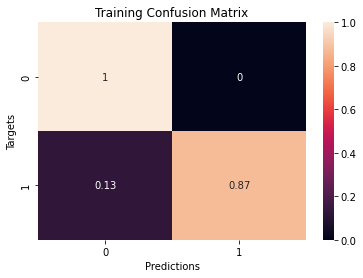

In [291]:
predict_and_plot(train_inputs,train_targets, name = 'Training');

Accuracy Score:  88.88888888888889


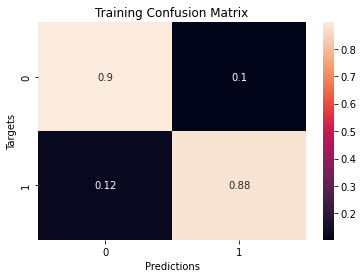

In [292]:
predict_and_plot(val_inputs,val_targets, name = 'Training');

Accuracy Score:  87.6923076923077


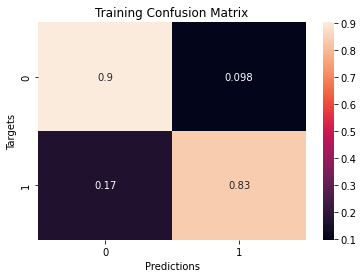

In [293]:
predict_and_plot(test_inputs,test_targets, name = 'Training');

In [294]:
model.score(train_inputs,train_targets)

0.9458333333333333

In [295]:
model.score(val_inputs,val_targets)

0.8888888888888888

In [296]:
model.score(test_inputs,test_targets)

0.8769230769230769

In [297]:
raw_df['flow_condition'].value_counts()/len(raw_df)

No     0.576324
Yes    0.423676
Name: flow_condition, dtype: float64

## Visulaisation of Decision tree

In [298]:
from sklearn.tree import plot_tree, export_text

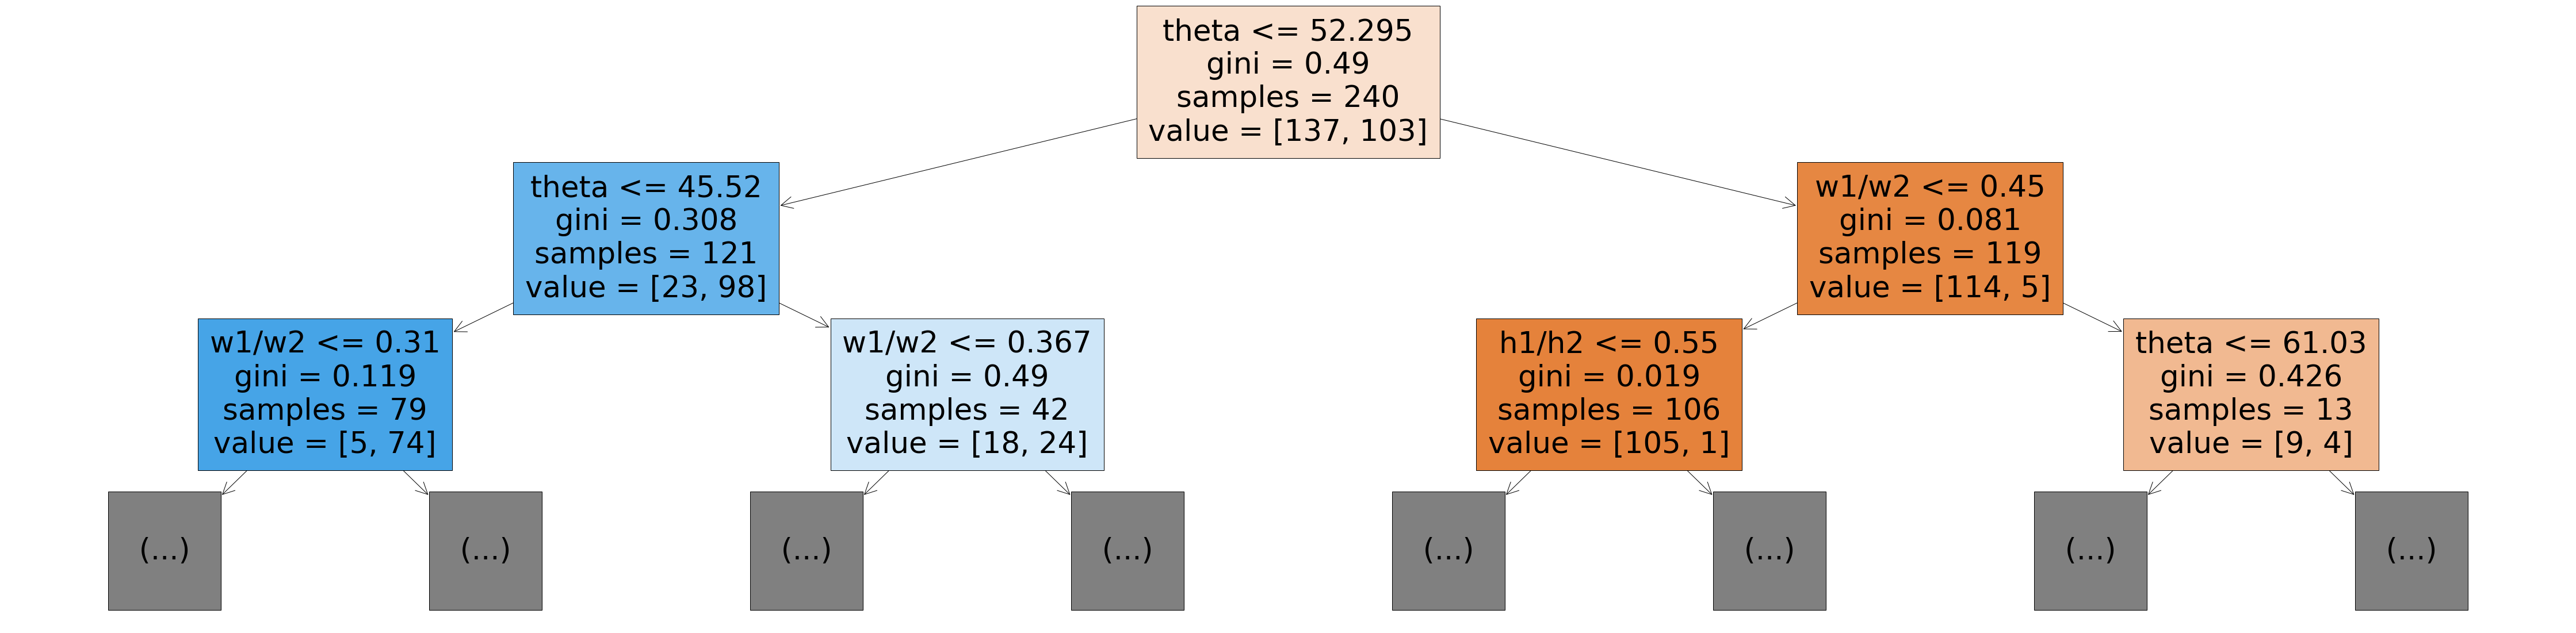

In [299]:
plt.figure(figsize = (80,20))
plot_tree(model, feature_names = train_inputs.columns, max_depth = 2, filled = True);

In [300]:
model.tree_.max_depth

9

In [301]:
model.feature_importances_

array([0.07587411, 0.11065575, 0.81347014])

In [302]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [303]:
importance_df

,feature,importance
2,theta,0.813470
1,w1/w2,0.110656
0,h1/h2,0.075874


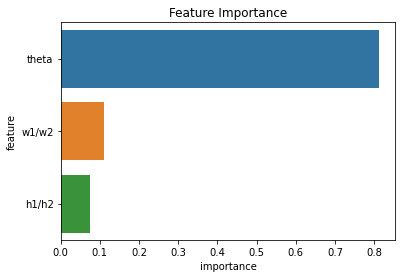

In [304]:
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

Hyperparameter Tuning and Overfitting

In [305]:
model = DecisionTreeClassifier(max_depth=8, random_state=43)

In [306]:
model.fit(train_inputs, train_targets)

DecisionTreeClassifier(max_depth=8, random_state=43)

In [307]:
model.score(train_inputs, train_targets)

0.9458333333333333

In [308]:
model.score(val_inputs, val_targets)

0.8888888888888888

In [309]:
model.score(test_inputs, test_targets)

0.8769230769230769

In [310]:
print(export_text(model, feature_names=list(train_inputs.columns)))

|--- theta <= 52.30
|   |--- theta <= 45.52
|   |   |--- w1/w2 <= 0.31
|   |   |   |--- theta <= 37.45
|   |   |   |   |--- class: Yes
|   |   |   |--- theta >  37.45
|   |   |   |   |--- h1/h2 <= 0.63
|   |   |   |   |   |--- class: Yes
|   |   |   |   |--- h1/h2 >  0.63
|   |   |   |   |   |--- h1/h2 <= 0.83
|   |   |   |   |   |   |--- h1/h2 <= 0.71
|   |   |   |   |   |   |   |--- w1/w2 <= 0.27
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- w1/w2 >  0.27
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- h1/h2 >  0.71
|   |   |   |   |   |   |   |--- w1/w2 <= 0.27
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |--- w1/w2 >  0.27
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- h1/h2 >  0.83
|   |   |   |   |   |   |--- class: Yes
|   |   |--- w1/w2 >  0.31
|   |   |   |--- class: Yes
|   |--- theta >  45.52
|   |   |--- w1/w2 <= 0.37
|   |   |   |--- h1/h2 <= 0.63
|   |   |

In [311]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=43)
    model.fit(train_inputs, train_targets)
    train_acc = 1 - model.score(train_inputs, train_targets)
    val_acc = 1 - model.score(val_inputs, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [312]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,9)])
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.116667,0.111111
1,2,0.116667,0.111111
2,3,0.070833,0.061728
3,4,0.070833,0.061728
4,5,0.070833,0.061728
5,6,0.062500,0.111111
6,7,0.054167,0.111111
7,8,0.054167,0.111111


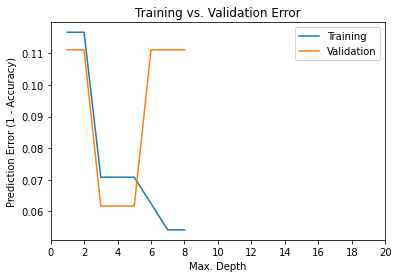

In [313]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

## Training a Random forest

In [314]:
from sklearn.ensemble import RandomForestClassifier

In [315]:
model = RandomForestClassifier(n_jobs = -1, random_state = 43)

In [316]:
%%time
model.fit(train_inputs, train_targets)

CPU times: total: 703 ms
Wall time: 538 ms


RandomForestClassifier(n_jobs=-1, random_state=43)

In [317]:
model.score(train_inputs, train_targets)

0.9458333333333333

In [318]:
model.score(val_inputs, val_targets)

0.8888888888888888

In [319]:
model

RandomForestClassifier(n_jobs=-1, random_state=43)

In [320]:
model.score(test_inputs, test_targets)

0.8769230769230769

In [321]:
train_probs = model.predict_proba(train_inputs)
train_probs

array([[1.        , 0.        ],
       [0.96      , 0.04      ],
       [0.8525    , 0.1475    ],
       [0.01166667, 0.98833333],
       [1.        , 0.        ],
       [0.5395    , 0.4605    ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.05      , 0.95      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.98      , 0.02      ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.98      , 0.02      ],
       [0.95      , 0.05      ],
       [0.12333333, 0.87666667],
       [0.44083333, 0.55916667],
       [0.95833333, 0.04166667],
       [1.        , 0.        ],
       [0.97      , 0.03      ],
       [0.05      , 0.95      ],
       [0.02      , 0.98      ],
       [0.03666667, 0.96333333],
       [0.44766667, 0.55233333],
       [0.98      , 0.02      ],
       [0.875     , 0.125     ],
       [0.01      , 0.99      ],
       [0.1       , 0.9       ],
       [0.49633333, 0.50366667],
       [0.

In [322]:
model.estimators_[0]


DecisionTreeClassifier(max_features='auto', random_state=494155588)

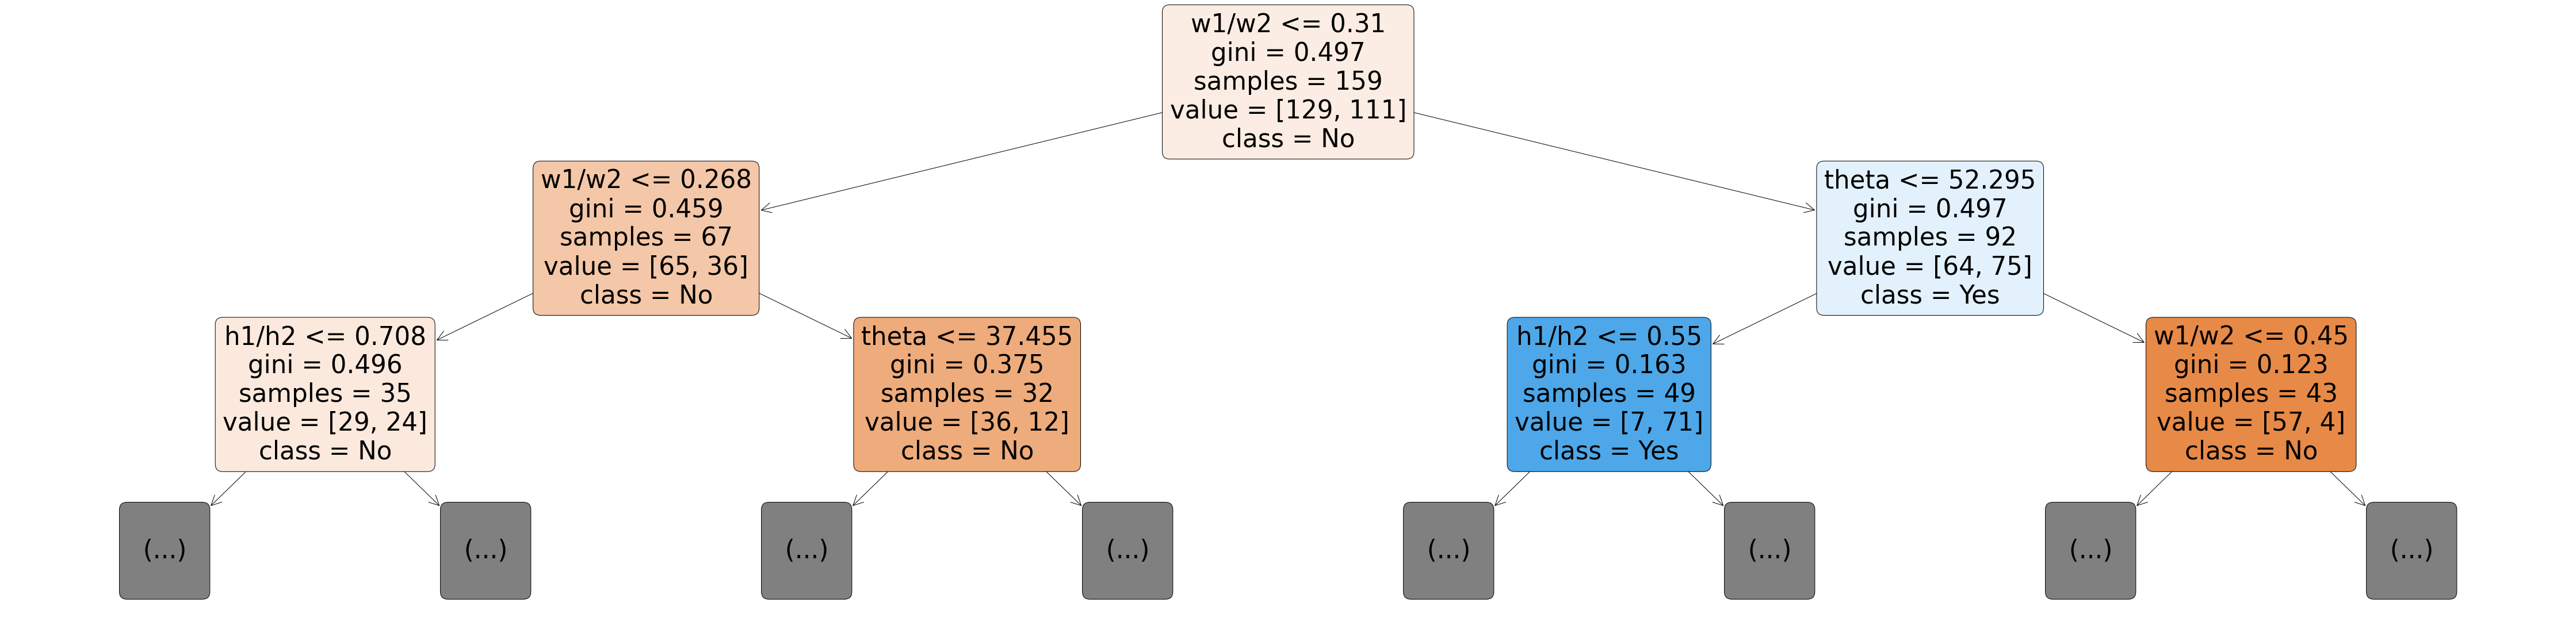

In [323]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=train_inputs.columns, filled=True, rounded=True, class_names=model.classes_);

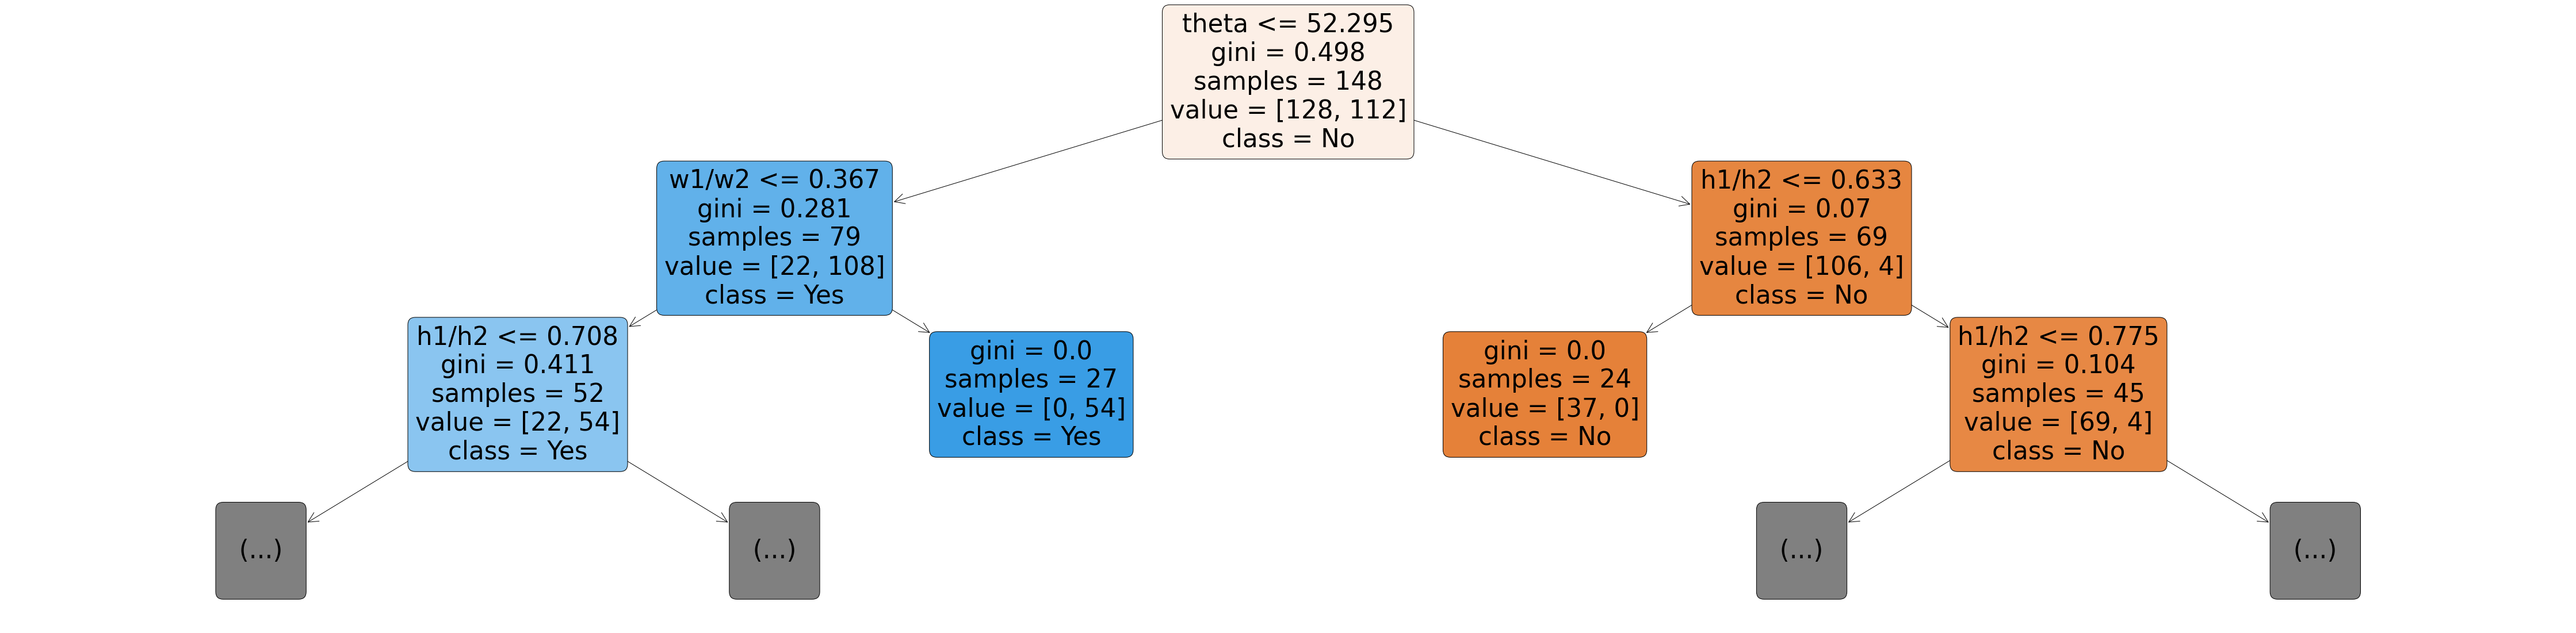

In [324]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=train_inputs.columns, filled=True, rounded=True, class_names=model.classes_);

In [325]:
len(model.estimators_)

100

In [326]:
importance_df = pd.DataFrame({
                'feature'  : train_inputs.columns,
                'importance' : model.feature_importances_
}).sort_values('importance', ascending = False)

In [327]:
importance_df

,feature,importance
2,theta,0.790780
1,w1/w2,0.119403
0,h1/h2,0.089818


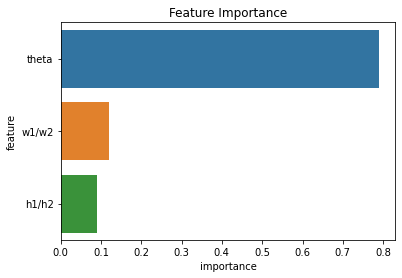

In [328]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');